<img src="images/into.jpg" align="left">

#### Welcome!

In this workshop, we're going to recreate Kepler's breakthrough discovery of the elliptical orbit of Mars. This was a turning point in the history of science, as it showed us that we weren't at the center of the Universe, and that we could discover it's mysteries with the right approach!

With the help of modern technology, we can do in a couple of hours what took Kepler about 20 years! Remember this is an interactive session, so **please ask questions** whenever something is unclear. 

With that, let's jump right in!


## Part 1: Triangulating the Locations of Mars

In this section, we are going to triangulate the locations of Mars by using our knowledge of its orbital period. 

Let's say we record the position of Earth and measured the angle to Mars on a particular day. Then, 687 days later, we know that Mars is going to be in the same place, but Earth is not. So, we record Earth's location and measure the angle to Mars again.

Then from the pair of Earth locations and Mars angles, we can find Mars!

<img src="images/triangulationDiagram.jpg" height="550" width="550">

Then, each of our paired-observations will look something like this:



| Earth Locations | Mars Angles |
|:----------------------:|:----------------------:|
| [x1, y1]               | marsAngle1             |
| [x2, y2]               | marsAngle2             |



Now that we understand what the data looks like, we can start programming! For this section we are going to use the triangulate module from the mars_orbit package that has been provided to you.

In [1]:
from mars_orbit import triangulate

### Loading the Data

In [2]:
# TASK: Load the data into two lists - earthLocations and marsAngles. 

# triangulate has a loadData function.
#    Input:  none
#    Output: earthLocations, list of Earth Locations
#            marsAngles, list of angles to Mars

### START CODE HERE ###

earthLocations, marsAngles = triangulate.loadData()

### END CODE HERE  ###

### Finding five positions of Mars

In [3]:
# TASK: Find five positions of Mars, make list called marsLocations

# triangulate has a findMars function.
#    Input:  earthLocation1, marsAngle1, earthLocation2, marsAngle2
#    Output: marsLocation

marsLocations = []

### START CODE HERE ###
# Hint: you might want to use a for loop!

for j in range(5):
    i1 = 2 * j
    i2 = i1 + 1
    marsLocations.append(triangulate.findMars(earthLocations[i1], marsAngles[i1], 
                                              earthLocations[i2], marsAngles[i2]))


### END CODE HERE  ###

print marsLocations

[[-1.45297367276038, 0.8655335301531039], [1.195672782788594, -0.686856634618109], [1.0738853142069973, 1.051106927548351], [-1.6323045900130566, -0.14854179871578327], [-1.5537673314861347, 0.6248989852957586]]


**Expected Result:**

<table> 
<tr> 
<td>
**Mars Locations (rounded) **
</td>
<td>
[[-1.4529, 0.8655], [1.1956, -0.6868], [1.0738, 1.0511], [-1.6323, -0.1485], [-1.5537, 0.6248]]

</td>
</tr> 

</table> 

### Fitting a circle for the Orbit

Congratulations! You've successfully triangulated the locations of Mars from the data. Now that we have these locations, let's fit a circle to these locations and observe the radius of the orbit. Then, we can go ahead and plot our results.

In [4]:
# TASK: Find the radius of the best-fit circle for the triangulated locations of Mars

# triangulate has a computeRadius function.
#    Input:  list of marsLocations
#    Output: radius of best-fit circle

triangulatedRadius = None

### START CODE HERE ###

triangulatedRadius = triangulate.computeRadius(marsLocations)

### END CODE HERE  ###

print "Radius of best fit circle:", triangulatedRadius

Radius of best fit circle: 1.57732091444


**Expected Result:**

<table> 
<tr> 
<td>
**Radius of best fit circle:**
</td>
<td>
1.57732091444
    </td>
</tr> 

</table> 

### Plotting results of Triangulation

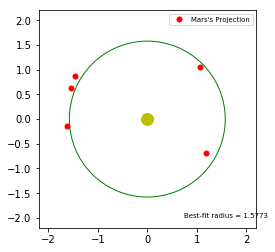

In [5]:
# TASK: Plot the results of the triangulation process

# triangulate has a plotTriangulations function.
#    Input:  marsLocations, list of Mars locations
#            triangulatedRadius, radius of best-fit circle to triangulations
#    Output: plot with Mars locations and best-fit circle

### START CODE HERE ###

triangulate.plotTriangulations(marsLocations, triangulatedRadius)
### END CODE HERE  ###

**Expected Result:**
 
 <img src="images/triangulationPlot.png">
 
 
 

## Part 2: Fitting the Mars Orbital Plane

Congratulations! We've successfully used the data to triangulate five positions of Mars. 

We know that an opposition occurs when the Sun, Mars and Earth lie on the same straight line. When this happens, the angle to Mars is the same from both the Earth and the Sun, as shown below:





<img src="images/oppositionDiagram.jpg">

Kepler made use of precisely this "opposition trick" to calculate the Mars Orbital plane. So, we the have longitude to Mars with respect to the Sun. We also have latitudes to Mars with respect to the Earth. From these two lists, we can find the coordinates of Mars on the celestial sphere. The code will walk you through the process. Let's get started!

In [6]:
from mars_orbit import plane

### Loading the Data

In [7]:
# TASK: Load the data into two lists - helioLong and geoLat

# plane has a loadData function.
#    Input:  none
#    Output: helioLong, list of Mars longitudes with respect to the Sun
#            geoLat, list of Mars latitudes with respect to the Earth

helioLong = None
geoLat = None

### START CODE HERE ###

helioLong, geoLat = plane.loadData()

### END CODE HERE  ###

### Finding Heliocentric Latitudes from Geocentric Latitudes

<img src="images/latitudeConversion.jpg">

The diagram above illutrates the relationship between geocetric latitudes and heliocentric latitudes at opposition. Since we have the radius of projection on the Ecliptic plane (from Part 1), we can convert the given geocentric latitudes to heliocentric latitudes.



In [8]:
# TASK: Find the heliocentric Mars latitudes from the corresponding geocentric latitudes

# plane has a findHelioLat function.
#    Input:  triangulatedRadius, radius of best-fit circle to triangulations
#            geoLat, list of geocentric Mars latitudes
#    Output: helioLat, list of heliocentric Mars latitudes

helioLat = []

### START CODE HERE ###

helioLat = plane.findHelioLat(triangulatedRadius, geoLat)

### END CODE HERE  ###

print helioLat

[0.010649505593854596, 0.026230164150444865, 0.02901201977701551, 0.02355776692957665, 0.007666741861229796, -0.025588578152562023, -0.038665603388400485, 0.0008517536672477792, 0.022703068870033715, 0.028797931899050264, 0.0266579651302927, 0.015552578508786719]


**Expected Result:**
    
    
<table> 
<tr> 
<td>
** Heliocentric Latitudes (first three) **
</td>
<td>
[0.010649, 0.026230, 0.029012]
</td>
</tr> 

</table> 

### Finding the Coordinates of Mars on the Celestial Sphere

Now that we have heliocentric longitudes and latitudes, we can find the locations of Mars on the celestial sphere. The geometry of this is not that important, it's sufficient to know that the intersection of the longitude and latitude lines result in a unique location on the celestial sphere.

In [9]:
# TASK: Find the coordinates of Mars on the celestial sphere from the heliocentric latitudes and longitudes

# plane has a findCoordinates function.
#    Input:  helioLong, list of heliocentric Mars longitudes
#            helioLat , list of heliocentric Mars latitudes
#    Output: coordinates, list of x-y-z coordinates of Mars on the celestial sphere

coordinates = []

### START CODE HERE ###

coordinates = plane.findCoordinates(helioLong, helioLat)

### END CODE HERE  ###

# printing the coordinates of the first Mars location
print coordinates[0][0], coordinates[1][0], coordinates[2][0]

0.399104315164 0.916843682388 0.0106493042981


**Expected Result:**

<table> 
<tr> 
<td>
**First Coordinates **
</td>
<td>
[0.399104315164, 0.916843682388, 0.0106493042981]
</td>
</tr> 

</table> 

### Fitting a Plane for the Mars Orbit

From the coordinates of Mars on the Celestial Sphere, we can fit a plane for the orbit of Mars. First we will find the parameters of this plane, and then we can plot our results!

In [10]:
# TASK: Fit a plane of the form ax + by + z = 0 to the found Mars coordinates

# plane has a fitPlane function.
#    Input:  coordinates, list of x-y-z coordinates of Mars on the celestial sphere
#    Output: planeParameters, list of parameters of the best-fit plane [a, b]

planeParameters = []

### START CODE HERE ###

planeParameters = plane.fitPlane(coordinates)

### END CODE HERE  ###

print planeParameters

[0.02363924283214023, -0.02210540301259405]


**Expected Result:**

<table> 
<tr> 
<td>
** Plane Parameters (rounded): **
</td>
<td>
[0.023639, -0.022105]
</td>
</tr> 

</table> 

### Plot Coordinates and Fitted Plane

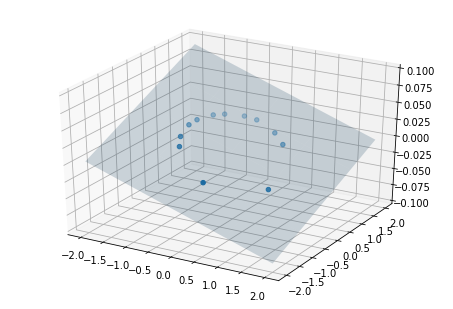

In [11]:
# TASK: Plot the coordinates and fitted plane
# plane has a plotPlane function.
#    Input:  coordinates, list of x-y-z coordinates of Mars on the celestial sphere
#            planeParameters, list of parameters of the best-fit plane [a, b]
#    Output: required plot

### START CODE HERE ###

plane.plotPlane(coordinates, planeParameters)

### END CODE HERE  ###

**Expected Result:**

<img src="images/planePlot.png">

### Find Mars Orbital Inclination

In [18]:
# TASK: Find the Mars orbital inclination with respect to the ecliptic plane

# plane has a findInclination function.
#    Input:  planeParameters, parameters of the best-fit plane
#    Output: orbitalInclination

orbitalInclination = None

### START CODE HERE ###

orbitalInclination = plane.findInclination(planeParameters)

### END CODE HERE  ###

print "Orbital Inclination:", orbitalInclination

Orbital Inclination: 1.85370378718


**Expected Result:**

<table> 
<tr> 
<td>
** Orbital Inclination: **
</td>
<td>
1.85370378718
</td>
</tr> 

</table> 

## Part 3: Fitting a Circle & Ellipse for the Mars Orbit

Congratulations! We've managed to triangulate the projections of Mars on the ecliptic plane, and fit a plane for it's orbit! This alone is quite the feat! Since we're so close to the end, let's combine these results and finish our recreation of Kepler's breakthrough!

In [13]:
from mars_orbit import orbit

### Lifting Mars Projections onto Orbital Plane

In [19]:
# TASK: Lift the triangulated marsLocations from Part 1 onto the orbital plane found in Part 2.

# orbit has a liftCoordinates function.
#    Input:  planeParameters, parameters of the best-fit plane
#            marsLocations, triangulated Mars locations (from Part 1)
#            
#    Output: trueMarsLocations, positions of Mars on its Orbital plane

trueMarsLocations = None

### START CODE HERE ###

trueMarsLocations = orbit.liftCoordinates(planeParameters, marsLocations)
### END CODE HERE  ###

print trueMarsLocations

[[-1.45297367276038, 0.8655335301531039, 0.053480164984036856], [1.195672782788594, -0.686856634618109, -0.04344804198022779], [1.0738853142069973, 1.051106927548351, -0.0021506934736226224], [-1.6323045900130566, -0.14854179871578327, 0.03530286825450773], [-1.5537673314861347, 0.6248989852957586, 0.05054352716577109]]


**Expected Result:**

<table> 
<tr> 
<td>
**True Mars Locations (rounded): **
</td>
<td>
[[-1.452, 0.865, 0.053], [1.195, -0.686, -0.043], [1.0738, 1.051, -0.002], [-1.632, -0.148, 0.035], [-1.553, 0.624, 0.050]]

</td>
</tr> 

</table> 

We now have the true locations of Mars on its Orbital plane. Now, let's go ahead and fit both a Circle and an Ellipse for the orbit. We will then examine the error produced by each of these shapes, and this should tell us the actual shape of the orbit!

### Fitting a Circle for the Orbit

In [20]:
# TASK: Fit a circle to the to trueMarsLocations

# orbit has a fitCircle function.
#    Input:  trueMarsLocations, locations of Mars on it's Orbital plane  
#    Output: circleRadius, radius of best fit circle
#            circleLoss, error for fitting a circle for the orbit

circleRadius = None
circleLoss = None

### START CODE HERE ###

circleRadius, circleLoss = orbit.fitCircle(trueMarsLocations)

### END CODE HERE  ###
print "Circle Radius:", circleRadius
print "Circle Error:", circleLoss 


Circle Radius: 1.57785569619
Circle Error: 0.0713267060982


**Expected Result:**

<table> 
<tr> 
<td>
**Circle Radius: **
</td>
<td>

1.577855
</td>
</tr> 
<tr>
    <td>
        **Circle Error: **
    </td>
    <td>
        0.071326
    </td>
</tr>
    
        

</table> 

### Fitting an Ellipse for the Orbit

In [27]:
# TASK: Fit a circle to the to trueMarsLocations

# orbit has a fitCircle function.
#    Input:  trueMarsLocations, locations of Mars on it's Orbital plane  
#    Output: ellipseParameters, parameters of fitted ellipse
#            circleLoss, error for fitting an ellipse for the orbit

ellipseParameters = None
ellipseLoss = None

### START CODE HERE ###

ellipseParameters, ellipseLoss = orbit.fitEllipse(trueMarsLocations)
### END CODE HERE  ###

print "Ellipse Parameters:", ellipseParameters
print "Ellipse Error:", ellipseLoss 

Ellipse Parameters: [-0.24055211118081787, 0.1985421023207517, 3.0678768713386857]
Ellipse Error: 0.000242479159336


**Expected Result:**

<table> 
<tr> 
<td>
** Ellipse Parameters: **
</td>
<td>
[-0.24055, 0.19854, 3.06787]

</td>
</tr> 
<tr>
    <td>
        **Ellipse Error: **
    </td>
    <td>
        0.00024
    </td>
</tr>
    
        

</table> 

### Comparing Circular and Elliptical Orbital Error

Fitting a circle for the Mars Orbit has yielded the following errors:

<table>
<tr>
    <td>
        **Circle Error: **
    </td>
    <td>
        0.07132
    </td>
</tr>
<tr>
    <td>
        **Ellipse Error: **
    </td>
    <td>
        0.00024
    </td>
</tr>   

</table> 

We see that fitting a circle has almost 300 times the error of fitting an Ellipse! Thus, the orbit of Mars must be elliptical! Let's plot a figure to confirm this.

### Plotting Comparison of Circular and Elliptical Orbits

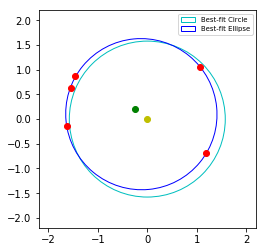

In [28]:
# TASK: Plot circular and elliptical orbits for Mars to compare them

# orbit has a plotBoth function.
#    Input:  trueMarsLocations, locations of Mars on it's Orbital plane
#            circleRadius, radius of the fitted circle
#            ellipseParameters, parameters of fitted ellipse

#    Output: required plot

### START CODE HERE ###

orbit.plotBoth(trueMarsLocations, circleRadius, ellipseParameters)

### END CODE HERE  ###

**Expected Result:**

<img src="images/orbitPlot.png">

Thus, we see that the Ellipse is a near-perfect fit to our data whereas the Circle is quite skewed. Thus we've rigorously validated Kepler's results! Congratulations on completing this programming exercise!

** Note: **
We hope you enjoyed this workshop. Please direct any questions or feedback to Pulkit Singh (pulkit@princeton.edu). If you are curious about how any of the functions work, feel free to open up the code to take a look!